## 02 Exploratory Data Analysis

Project: Building a Personalised Playlist Generator for Spotify
<br>
Name: Syahiran Rafi

---

### Description

The goal of EDA is to have a better understanding of the data set. For this project, specifically, I want to determine the popularity of certain genres, and the different sub-genres available for the common genres (e.g., pop, rock, r&b).

Something to keep in mind before performing EDA is the intended user journey, which involves two main stages:
1. Select your favourite genre(s) to generate a list of random tracks
2. Select at least 3 songs from the randomly generated list to create your own personalist playlist of 15 songs

With a better understanding of which genres are more popular amongst listeners, first-time users may then be suggested more common genres in the first "random track generator" stage.

---

### 1. Import libraries

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px

---

### 2. Read track data sets into a data frame

Both the processed 10k data set and 40k data set (from `01_Data_Collection`) are read into data frames and will be used to conduct exploratory data analysis.

With reference to the functions in `03_Recommender`:
- The 10k data set will be used to build the `generate_random_tracks` function.
- The 40k data set will be used to build the `cosine_similarity` matrix for the `recommend_songs` function.

In [2]:
tracks_40k_df = pd.read_csv("../data/spotify-40k-processed.csv")

In [3]:
tracks_40k_df

,track_uri,track_name,artist_name,artist_genres,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,spotify:track:1xazlnvtthcdzt2ni1dtxo,justified & ancient - stand by the jams,the klf,"acid house,ambient house,big beat,hip house",0.617,0.872,8.0,-12.305,1.0,0.0480,0.0158,0.112000,0.4080,0.504,111.458
1,spotify:track:6a8gbqilv8hbuw3c6uk9ph,i know you want me (calle ocho),pitbull,"dance pop,miami hip hop,pop",0.825,0.743,2.0,-5.995,1.0,0.1490,0.0142,0.000021,0.2370,0.800,127.045
2,spotify:track:70xtwbcvzcpaoddjftmcvi,from the bottom of my broken heart,britney spears,"dance pop,pop",0.677,0.665,7.0,-5.171,1.0,0.0305,0.5600,0.000001,0.3380,0.706,74.981
3,spotify:track:1nxuwypjk5ko6dqj5t7bdu,apeman - 2014 remastered version,the kinks,"album rock,art rock,british invasion,classic r...",0.683,0.728,9.0,-8.920,1.0,0.2590,0.5680,0.000051,0.0384,0.833,75.311
4,spotify:track:72wztws6v7uu3amgmmekye,you can't always get what you want,the rolling stones,"album rock,british invasion,classic rock,rock",0.319,0.627,0.0,-9.611,1.0,0.0687,0.6750,0.000073,0.2890,0.497,85.818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40542,spotify:track:3uchi1gfoul5j5sweh0tch,i don't know,jon d,unknown,0.669,0.228,2.0,-12.119,1.0,0.0690,0.7920,0.065000,0.0944,0.402,83.024
40543,spotify:track:0p1oo2gremyucookzyayfu,the answer,big words,australian r&b,0.493,0.727,1.0,-5.031,1.0,0.2170,0.0873,0.000000,0.1290,0.289,73.259
40544,spotify:track:2om4burudnevk59ivixcwn,25.22,allan rayman,"canadian contemporary r&b,modern alternative rock",0.702,0.524,7.0,-10.710,1.0,0.0793,0.3320,0.055300,0.2980,0.265,140.089
40545,spotify:track:4ri5ttugjm96tbqzd5ua7v,good feeling,jon jason,unknown,0.509,0.286,8.0,-14.722,1.0,0.1230,0.4020,0.000012,0.1310,0.259,121.633


In [4]:
tracks_40k_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40547 entries, 0 to 40546
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_uri         40547 non-null  object 
 1   track_name        40546 non-null  object 
 2   artist_name       40546 non-null  object 
 3   artist_genres     40012 non-null  object 
 4   danceability      40545 non-null  float64
 5   energy            40545 non-null  float64
 6   key               40545 non-null  float64
 7   loudness          40545 non-null  float64
 8   mode              40545 non-null  float64
 9   speechiness       40545 non-null  float64
 10  acousticness      40545 non-null  float64
 11  instrumentalness  40545 non-null  float64
 12  liveness          40545 non-null  float64
 13  valence           40545 non-null  float64
 14  tempo             40545 non-null  float64
dtypes: float64(11), object(4)
memory usage: 4.6+ MB


In [5]:
tracks_10k_df = pd.read_csv("../data/spotify-top-10k-processed.csv")

In [6]:
tracks_10k_df

,track_uri,track_name,artist_uri,artist_name,album_uri,album_name,album_artist_uri,album_artist_name,album_release_date,album_image_url,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,album_genres,label,copyrights
0,spotify:track:1xazlnvtthcdzt2ni1dtxo,justified & ancient - stand by the jams,spotify:artist:6dyrdrlnzskavxyg5irvch,the klf,spotify:album:4mc0zjntvp1ndd5lslxfjc,songs collection,spotify:artist:6dyrdrlnzskavxyg5irvch,the klf,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.0480,0.015800,0.112000,0.4080,0.504,111.458,4.0,NaN,jams communications,"c 1992 copyright control, p 1992 jams communic..."
1,spotify:track:6a8gbqilv8hbuw3c6uk9ph,i know you want me (calle ocho),spotify:artist:0tnoyisbd1xyrbk9myaseg,pitbull,spotify:album:5xlacbvbsalrtpxnkkggxa,pitbull starring in rebelution,spotify:artist:0tnoyisbd1xyrbk9myaseg,pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.1490,0.014200,0.000021,0.2370,0.800,127.045,4.0,NaN,mr.305/polo grounds music/j records,"p (p) 2009 rca/jive label group, a unit of son..."
2,spotify:track:70xtwbcvzcpaoddjftmcvi,from the bottom of my broken heart,spotify:artist:26dsoyclwsylmakd3tpor4,britney spears,spotify:album:3wnxdumksmgmjrhegk80qx,...baby one more time (digital deluxe version),spotify:artist:26dsoyclwsylmakd3tpor4,britney spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.0305,0.560000,0.000001,0.3380,0.706,74.981,4.0,NaN,jive,p (p) 1999 zomba recording llc
3,spotify:track:1nxuwypjk5ko6dqj5t7bdu,apeman - 2014 remastered version,spotify:artist:1sqrv42e4pjeyfphs0tk9e,the kinks,spotify:album:6ll6hugnen4vlc8sj0zcse,"lola vs. powerman and the moneygoround, pt. on...",spotify:artist:1sqrv42e4pjeyfphs0tk9e,the kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.2590,0.568000,0.000051,0.0384,0.833,75.311,4.0,NaN,sanctuary records,"c © 2014 sanctuary records group ltd., a bmg c..."
4,spotify:track:72wztws6v7uu3amgmmekye,you can't always get what you want,spotify:artist:22be4uq6banwshpvcdxlce,the rolling stones,spotify:album:0c78nsgqx6vfnisnwixwod,let it bleed,spotify:artist:22be4uq6banwshpvcdxlce,the rolling stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.0687,0.675000,0.000073,0.2890,0.497,85.818,4.0,NaN,universal music group,"c © 2002 abkco music & records inc., p ℗ 2002 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8870,spotify:track:6puzxtihkv346yp89nzp9x,kernkraft 400,spotify:artist:7vfpnlbcxbbfs4kfbulksl,zombie nation,spotify:album:2qmrrouzqemrkfr9pbmdhd,kernkraft 400 single mixes,spotify:artist:7vfpnlbcxbbfs4kfbulksl,zombie nation,2006-03-07,https://i.scdn.co/image/ab67616d0000b273916e34...,...,0.0868,0.005500,0.901000,0.1460,0.487,140.064,4.0,NaN,ukw records,"c 2006 copyright control, p 2006 copyright con..."
8871,spotify:track:3kcklokqqepvwxwljbgj5p,kernkraft 400 (a better day),"spotify:artist:0u6gtibw46tfx7koq6unjz, spotify...","topic, a7s",spotify:album:2nichqkijgw4r4dqfmg0a3,kernkraft 400 (a better day),"spotify:artist:0u6gtibw46tfx7koq6unjz, spotify...","topic, a7s",2022-06-17,https://i.scdn.co/image/ab67616d0000b273e1cafe...,...,0.0562,0.184000,0.000020,0.3090,0.400,125.975,4.0,NaN,virgin,"c © 2022 topic, under exclusive license to uni..."
8872,spotify:track:5k9qrzjfdap5cxvdzai02f,never say never - radio edit,spotify:artist:1sczsjoyaihnnm9qlhzdnl,vandalism,spotify:album:2n506u3hkn3caedvajv5ct,never say never,spotify:artist:1sczsjoyaihnnm9qlhzdnl,vandalism,2005-10-24,https://i.scdn.co/image/ab67616d0000b273b65ad4...,...,0.0340,0.000354,0.011200,0.3380,0.767,130.978,4.0,NaN,vicious,"c 2005 vicious, a division of vicious recordin..."
8873,spotify:track:5ydecnawdmfbu4zl0ropah,groovejet (if this ain't love) [feat. sophie e...,"spotify:artist:4bmymfwdu9zlcitrumrewb, spotify...","spiller, sophie ellis-bextor",spotify:album:20q3pgpyiyicf32x5l8pph,groovejet (if this ain't love) [feat. sophie e...,sp

In [7]:
tracks_10k_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8875 entries, 0 to 8874
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_uri            8875 non-null   object 
 1   track_name           8874 non-null   object 
 2   artist_uri           8873 non-null   object 
 3   artist_name          8874 non-null   object 
 4   album_uri            8873 non-null   object 
 5   album_name           8874 non-null   object 
 6   album_artist_uri     8873 non-null   object 
 7   album_artist_name    8873 non-null   object 
 8   album_release_date   8873 non-null   object 
 9   album_image_url      8871 non-null   object 
 10  disc_number          8875 non-null   int64  
 11  track_number         8875 non-null   int64  
 12  track_duration_(ms)  8875 non-null   int64  
 13  track_preview_url    6415 non-null   object 
 14  explicit             8875 non-null   bool   
 15  popularity           8875 non-null   i

---

### 3. Extract all genres and export as a CSV file

The `extract_genres` function is created to reformat genre strings `'pop,rock,dance'` into a list of genres `['pop', 'rock', 'dance']` to facilitate input into other functions downstream.

In [8]:
def extract_genres(input_string):
    # Check for null or missing values
    if pd.isna(input_string):
        return []
    # Split the input string based on the comma delimiter
    else:
        genre_list = input_string.split(',')
        return genre_list

In [9]:
tracks_10k_df['artist_genres'][0]

'acid house,ambient house,big beat,hip house'

In [10]:
# Test 'extract_genres' function
extract_genres(tracks_10k_df['artist_genres'][0])

['acid house', 'ambient house', 'big beat', 'hip house']

The `count_genre_occurrences` is created to count the occurrences of each genre in the data set. Each count does not represent a single track but rather an instance of the genre in the entire corpus.

For example, if a song contains the genres `'pop rock', 'alternative rock'`, the count for 'pop' is 1, and the count for 'rock' is 2.

Note: Most songs contain more than one genre, but some songs do not contain any genres (i.e., the `artist_genres` cell is empty). 

In [11]:
def count_genre_occurrences(df):
    genre_counts = {}

    # Iterate over each cell in the "artist_genres" column
    for genres_str in df['artist_genres']:
        genres_list = extract_genres(genres_str)
        
        # Count occurrence of each genre
        for genre in genres_list:
            if genre in genre_counts:
                genre_counts[genre] += 1
            else:
                genre_counts[genre] = 1

    return genre_counts

The top 10 genres in each data set are generated for comparison.

In [12]:
# List top 10 genres in 40k data set, sorted in descending order
genre_counts_40k = count_genre_occurrences(tracks_40k_df)
genres_40k_df = pd.DataFrame(list(genre_counts_40k.items()), columns=['genre', 'count']).sort_values(by='count', ascending=False)
genres_40k_df.head(10)

,genre,count
6,pop,6089
4,dance pop,4362
35,rap,3975
15,rock,3760
99,pop rap,3507
32,hip hop,3296
147,modern rock,2279
135,trap,2216
115,pop rock,2115
921,unknown,2022


In [13]:
# List top 10 genres in 10k data set, sorted in descending order
genre_counts_10k = count_genre_occurrences(tracks_10k_df)
genres_10k_df = pd.DataFrame(list(genre_counts_10k.items()), columns=['genre', 'count']).sort_values(by='count', ascending=False)
genres_10k_df.head(10)

,genre,count
6,pop,2204
4,dance pop,1331
15,rock,1098
17,soft rock,808
10,classic rock,748
23,mellow gold,673
88,australian rock,605
61,new wave pop,549
46,australian pop,537
7,album rock,537


Since the 10k data set draws from top songs in Australia and the US, Australian-centric genres are represented in the top 10 ('australian rock' and 'australian pop'). The 40k data set, on the other hand, tends to have more "universal" genres in the top 10 that can be broadly applied to different countries/markets.

Note: The "unknown" genre is a category of its own and not the same as a null value.

The `genres_10k_df` is exported into a CSV file as it will be used in the `generate_random_tracks` function, as seen in the `03_Recommender` notebook.

In [14]:
# Export the `genres_10k_df` data frame into a CSV file
# genres_10k_df.to_csv('../data/genres-10k.csv', index=False)

---

### 4. Group sub-genres into overarching genres

##### Compare total number of genres in each data set

In [15]:
# Count total number of genres in 10k data set
genres_10k_df['genre'].count()

908

In [16]:
# Count total number of genres in 40k data set
genres_40k_df['genre'].count()

2291

##### Consolidate top sub-genres in common over-arching genres

The top 20 genres in each data set are generated to have an idea of the top common genres. Common sub-genres are grouped into over-arching genres (e.g. "dance pop", "pop rap", "pop rock" are grouped as "pop").

In [17]:
# List top 20 genres in 10k data set, sorted in descending order
genres_10k_df.sort_values(by='count', ascending=False).head(20)

,genre,count
6,pop,2204
4,dance pop,1331
15,rock,1098
17,soft rock,808
10,classic rock,748
23,mellow gold,673
88,australian rock,605
61,new wave pop,549
46,australian pop,537
7,album rock,537


In [18]:
# List top 20 genres in 40k data set, sorted in descending order
genres_40k_df.sort_values(by='count', ascending=False).head(20)

,genre,count
6,pop,6089
4,dance pop,4362
35,rap,3975
15,rock,3760
99,pop rap,3507
32,hip hop,3296
147,modern rock,2279
135,trap,2216
115,pop rock,2115
921,unknown,2022


In [19]:
# Common over-arching genres as observed and consolidated from the top 20 lists above
common_genres = ['pop', 'rock', 'hip hop', 'rap', 'r&b', 'soul', 'dance', 'electronic', 'house', 'metal', 'punk', 'country']

In [20]:
# Count number of sub-genres for each over-arching genre in the 10k data set
# Input data into a dictionary
common_genres_10k_dict = {}
for genre in common_genres:
    num_subgenres = genres_10k_df[genres_10k_df['genre'].str.contains(genre, case=False)].shape[0]
    common_genres_10k_dict[genre] = num_subgenres

# Sort the dictionary by values in descending order
sorted_genres_10k_tuples = sorted(common_genres_10k_dict.items(), key=lambda x: x[1], reverse=True)

# Convert the sorted list of tuples back to a dictionary
sorted_genres_10k_dict = dict(sorted_genres_10k_tuples)
sorted_genres_10k_dict

{'pop': 147,
 'rock': 96,
 'hip hop': 49,
 'rap': 48,
 'house': 41,
 'punk': 28,
 'country': 24,
 'dance': 22,
 'soul': 21,
 'metal': 17,
 'r&b': 11,
 'electronic': 8}

In [21]:
# Count number of sub-genres for each over-arching genre in the 40k data set
# Input data into a dictionary
common_genres_40k_dict = {}
for genre in common_genres:
    num_subgenres = genres_40k_df[genres_40k_df['genre'].str.contains(genre, case=False)].shape[0]
    common_genres_40k_dict[genre] = num_subgenres

# Sort the dictionary by values in descending order
sorted_genres_40k_tuples = sorted(common_genres_40k_dict.items(), key=lambda x: x[1], reverse=True)

# Convert the sorted list of tuples back to a dictionary
sorted_genres_40k_dict = dict(sorted_genres_40k_tuples)
sorted_genres_40k_dict

{'pop': 251,
 'rock': 177,
 'hip hop': 97,
 'rap': 96,
 'metal': 79,
 'house': 61,
 'punk': 61,
 'country': 34,
 'soul': 32,
 'dance': 30,
 'electronic': 30,
 'r&b': 18}

This list of top genres is a useful starting point for users when selecting genres to generate their list of random tracks.

---

### 5. Visualise the distribution of genres and sub-genres

In this section, simple bar plot visualisations are generated to show:
- the distribution of common, over-arching genres in the 10k data set and 40k data set
- the distribution of sub-genres for each over-arching genre in the 10k data set

The following over-arching genres are represented:
- pop
- rock
- hip hop
- rap
- metal
- house
- punk
- country
- soul
- dance
- electronic
- r&b

##### Distribution of genres by number of sub-genres

I will observe the distributions of genres for both the 10k data set and 40k data set.

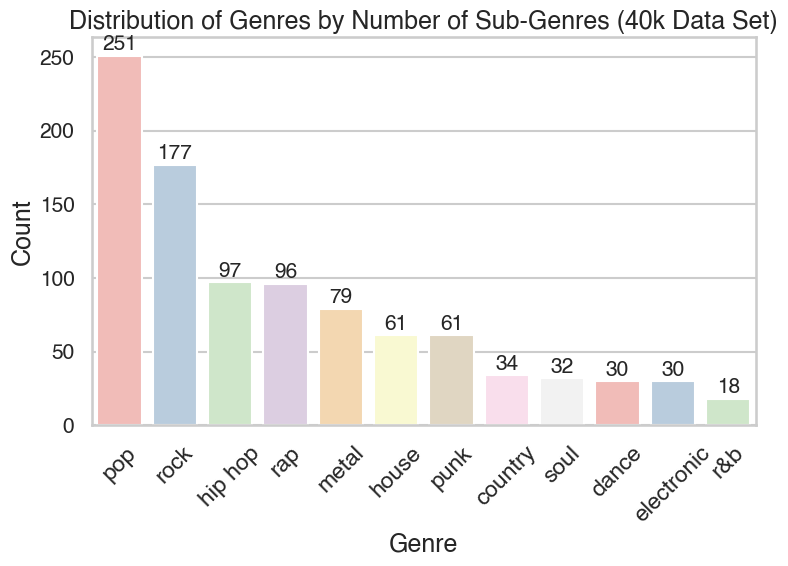

In [22]:
# Convert the dictionary to a DataFrame for seaborn usage
sorted_genres_40k_df = pd.DataFrame(sorted_genres_40k_dict.items(), columns=['Genre', 'Count'])

# Set the seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the bar plot with pastel colormap
plt.figure(figsize=(8, 6))
sns.barplot(x='Genre', y='Count', data=sorted_genres_40k_df, palette='Pastel1')

# Add text annotations to each bar
for idx, value in enumerate(sorted_genres_40k_df['Count']):
    plt.text(idx, value + 1, str(value), ha='center', va='bottom', fontname='Helvetica', fontsize=15)

# Set the title and axis labels
plt.title('Distribution of Genres by Number of Sub-Genres (40k Data Set)', fontname='Helvetica')
plt.xlabel('Genre', fontname='Helvetica')
plt.ylabel('Count', fontname='Helvetica')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, fontname='Helvetica')
plt.yticks(fontname='Helvetica', fontsize=15)

# Display the plot
plt.tight_layout()
plt.show()

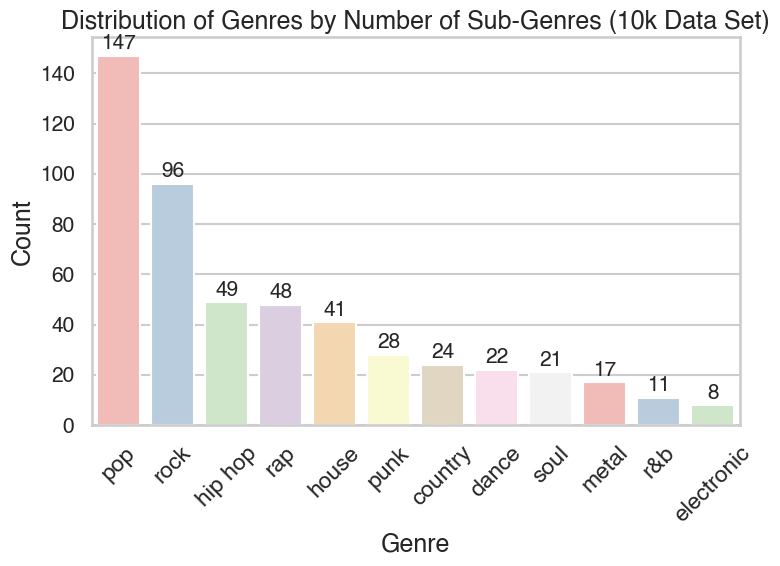

In [23]:
# Convert the dictionary to a DataFrame for seaborn usage
sorted_genres_10k_df = pd.DataFrame(sorted_genres_10k_dict.items(), columns=['Genre', 'Count'])

# Set the seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the bar plot with pastel colormap
plt.figure(figsize=(8, 6))
sns.barplot(x='Genre', y='Count', data=sorted_genres_10k_df, palette='Pastel1')

# Add text annotations to each bar
for idx, value in enumerate(sorted_genres_10k_df['Count']):
    plt.text(idx, value + 1, str(value), ha='center', va='bottom', fontname='Helvetica', fontsize=15)

# Set the title and axis labels
plt.title('Distribution of Genres by Number of Sub-Genres (10k Data Set)', fontname='Helvetica')
plt.xlabel('Genre', fontname='Helvetica')
plt.ylabel('Count', fontname='Helvetica')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, fontname='Helvetica')
plt.yticks(fontname='Helvetica', fontsize=15)

# Display the plot
plt.tight_layout()
plt.show()

As mentioned above, this list of top genres is a useful starting point for users when selecting genres to generate their list of random tracks. Based on the user studies I carried out, most users are able to choose at least 3 genres from this list that they enjoy listening to.

##### Distribution of sub-genres for each over-arching genre

For the following visualisations, I am trying to get a sensing of the popular sub-genres (e.g., "pop rock", "dance pop", "alternative rock") which can be input into the random track generator directly.

The idea is for me to suggest common sub-genres to users (during the user studies) only if they are sufficiently represented, and to discourage users from inputting obscure sub-genres that are underrepresented. This is so users may have a higher success rate with the randomly generated list of songs (i.e., higher likelihood of users recognising songs with as few "refreshes" as possible).

In the `03_Recommender` notebook, I will explain in greater detail why the `generate_random_tracks` function will draw data from the 10k data set instead of the 40k data set. With this consideration, he following visualisations will be generated based on the 10k data set.

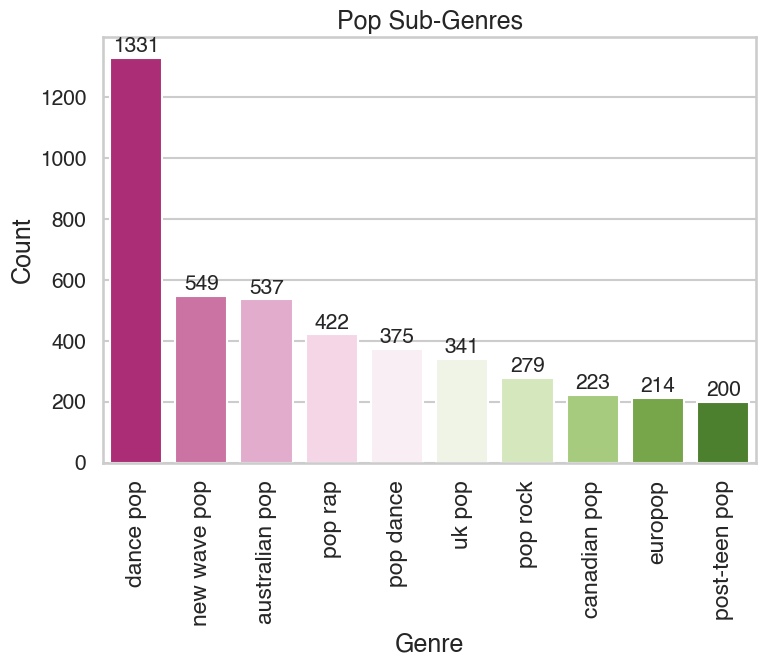

In [24]:
# Show top 10 "pop" sub-genres, excluding "pop" itself
pop_subgenres_all = genres_10k_df[genres_10k_df['genre'].str.contains('pop', case=False)]
pop_subgenres_top10 = pop_subgenres_all.sort_values(by='count', ascending=False).head(11).iloc[1:]

# Convert the top 10 subgenres to a DataFrame for seaborn usage
pop_subgenres_df = pop_subgenres_top10.sort_values(by='count', ascending=False)

# Set the seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the bar plot with pastel colormap
plt.figure(figsize=(8, 7))
sns.barplot(x='genre', y='count', data=pop_subgenres_df, palette='PiYG')

# Add text annotations to each bar
for idx, value in enumerate(pop_subgenres_df['count']):
    plt.text(idx, value + 5, str(value), ha='center', va='bottom', fontname='Helvetica', fontsize=15)

# Set the title and axis labels
plt.title('Pop Sub-Genres', fontname='Helvetica')
plt.xlabel('Genre', fontname='Helvetica')
plt.ylabel('Count', fontname='Helvetica')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90, fontname='Helvetica')
plt.yticks(fontname='Helvetica', fontsize=15)

# Display the plot
plt.tight_layout()
plt.show()

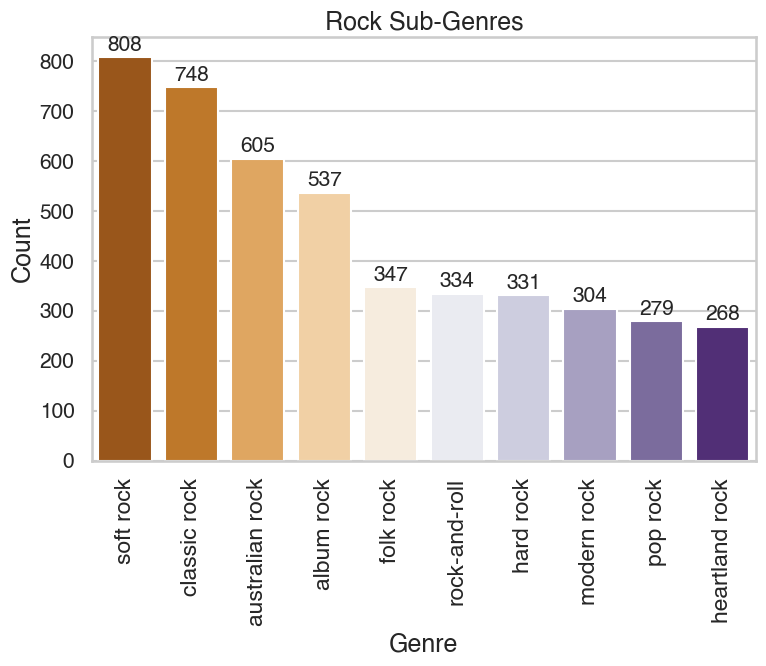

In [25]:
# Show top 10 "rock" sub-genres, excluding "rock" itself
rock_subgenres_all = genres_10k_df[genres_10k_df['genre'].str.contains('rock', case=False)]
rock_subgenres_top10 = rock_subgenres_all.sort_values(by='count', ascending=False).head(11).iloc[1:]

# Convert the top 10 subgenres to a DataFrame for seaborn usage
rock_subgenres_df = rock_subgenres_top10.sort_values(by='count', ascending=False)

# Set the seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the bar plot with pastel colormap
plt.figure(figsize=(8, 7))
sns.barplot(x='genre', y='count', data=rock_subgenres_df, palette='PuOr')

# Add text annotations to each bar
for idx, value in enumerate(rock_subgenres_df['count']):
    plt.text(idx, value + 5, str(value), ha='center', va='bottom', fontname='Helvetica', fontsize=15)

# Set the title and axis labels
plt.title('Rock Sub-Genres', fontname='Helvetica')
plt.xlabel('Genre', fontname='Helvetica')
plt.ylabel('Count', fontname='Helvetica')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90, fontname='Helvetica')
plt.yticks(fontname='Helvetica', fontsize=15)

# Display the plot
plt.tight_layout()
plt.show()

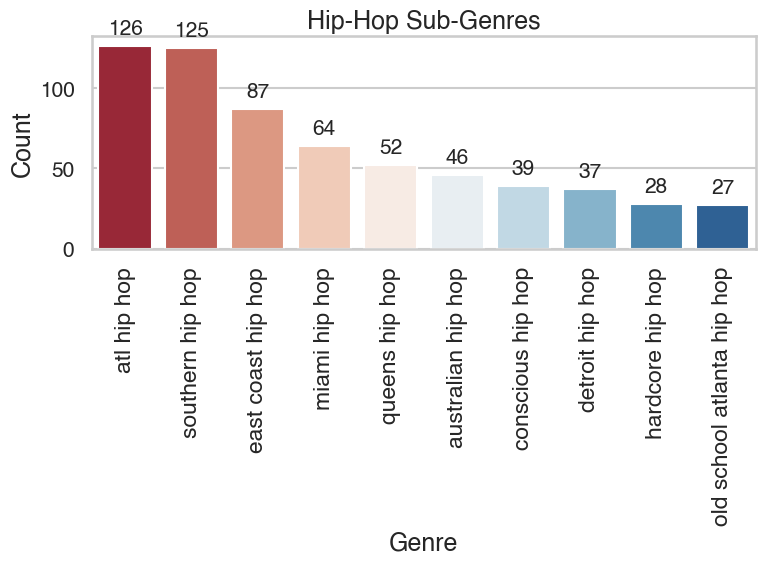

In [26]:
# Show top 10 "hip hop" sub-genres, excluding "hip hop" itself
hiphop_subgenres_all = genres_10k_df[genres_10k_df['genre'].str.contains('hip hop', case=False)]
hiphop_subgenres_top10 = hiphop_subgenres_all.sort_values(by='count', ascending=False).head(11).iloc[1:]

# Convert the top 10 subgenres to a DataFrame for seaborn usage
hiphop_subgenres_df = hiphop_subgenres_top10.sort_values(by='count', ascending=False)

# Set the seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the bar plot with pastel colormap
plt.figure(figsize=(8, 6))
sns.barplot(x='genre', y='count', data=hiphop_subgenres_df, palette='RdBu')

# Add text annotations to each bar
for idx, value in enumerate(hiphop_subgenres_df['count']):
    plt.text(idx, value + 5, str(value), ha='center', va='bottom', fontname='Helvetica', fontsize=15)

# Set the title and axis labels
plt.title('Hip-Hop Sub-Genres', fontname='Helvetica')
plt.xlabel('Genre', fontname='Helvetica')
plt.ylabel('Count', fontname='Helvetica')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90, fontname='Helvetica')
plt.yticks(fontname='Helvetica', fontsize=15)

# Display the plot
plt.tight_layout()
plt.show()

Note: RegEx "exact match" is required to search for "rap" so that "trap" genres do not appear in the result.

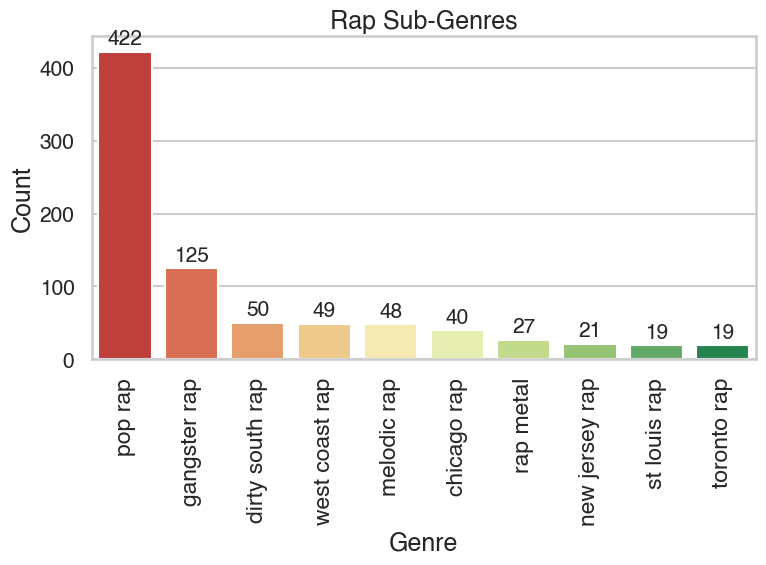

In [27]:
# Define the search term
search_term = r'\brap\b'

# Show top 10 "rap" sub-genres, excluding "rap" itself
rap_subgenres_all = genres_10k_df[genres_10k_df['genre'].str.contains(search_term, case=False)]
rap_subgenres_top10 = rap_subgenres_all.sort_values(by='count', ascending=False).head(11).iloc[1:]

# Convert the top 10 subgenres to a DataFrame for seaborn usage
rap_subgenres_df = rap_subgenres_top10.sort_values(by='count', ascending=False)

# Set the seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the bar plot with pastel colormap
plt.figure(figsize=(8, 6))
sns.barplot(x='genre', y='count', data=rap_subgenres_df, palette='RdYlGn')

# Add text annotations to each bar
for idx, value in enumerate(rap_subgenres_df['count']):
    plt.text(idx, value + 5, str(value), ha='center', va='bottom', fontname='Helvetica', fontsize=15)

# Set the title and axis labels
plt.title('Rap Sub-Genres', fontname='Helvetica')
plt.xlabel('Genre', fontname='Helvetica')
plt.ylabel('Count', fontname='Helvetica')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90, fontname='Helvetica')
plt.yticks(fontname='Helvetica', fontsize=15)

# Display the plot
plt.tight_layout()
plt.show()

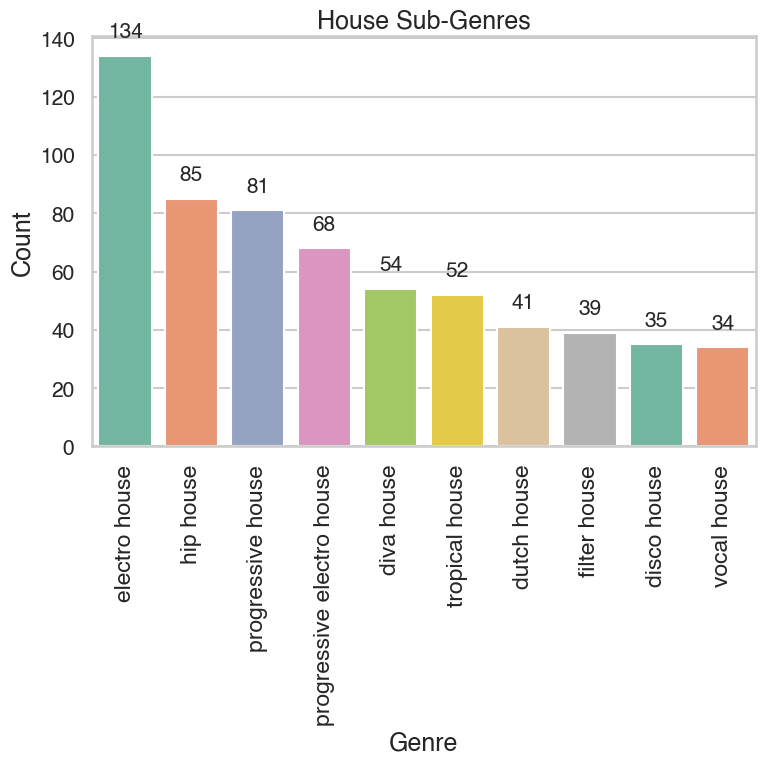

In [28]:
# Show top 10 "house" sub-genres, excluding "house" itself
house_subgenres_all = genres_10k_df[genres_10k_df['genre'].str.contains('house', case=False)]
house_subgenres_top10 = house_subgenres_all.sort_values(by='count', ascending=False).head(11).drop(136, axis=0)

# Convert the top 10 subgenres to a DataFrame for seaborn usage
house_subgenres_df = house_subgenres_top10.sort_values(by='count', ascending=False)

# Set the seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the bar plot with pastel colormap
plt.figure(figsize=(8, 8))
sns.barplot(x='genre', y='count', data=house_subgenres_df, palette='Set2')

# Add text annotations to each bar
for idx, value in enumerate(house_subgenres_df['count']):
    plt.text(idx, value + 5, str(value), ha='center', va='bottom', fontname='Helvetica', fontsize=15)

# Set the title and axis labels
plt.title('House Sub-Genres', fontname='Helvetica')
plt.xlabel('Genre', fontname='Helvetica')
plt.ylabel('Count', fontname='Helvetica')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90, fontname='Helvetica')
plt.yticks(fontname='Helvetica', fontsize=15)

# Display the plot
plt.tight_layout()
plt.show()

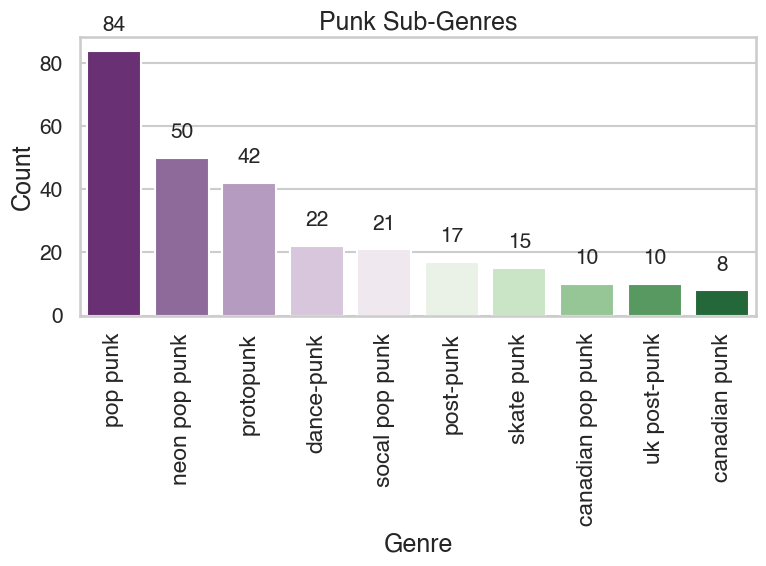

In [29]:
# Show top 10 "punk" sub-genres, excluding "punk" itself
punk_subgenres_all = genres_10k_df[genres_10k_df['genre'].str.contains('punk', case=False)]
punk_subgenres_top10 = punk_subgenres_all.sort_values(by='count', ascending=False).head(11).drop(203, axis=0)

# Convert the top 10 subgenres to a DataFrame for seaborn usage
punk_subgenres_df = punk_subgenres_top10.sort_values(by='count', ascending=False)

# Set the seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the bar plot with pastel colormap
plt.figure(figsize=(8, 6))
sns.barplot(x='genre', y='count', data=punk_subgenres_df, palette='PRGn')

# Add text annotations to each bar
for idx, value in enumerate(punk_subgenres_df['count']):
    plt.text(idx, value + 5, str(value), ha='center', va='bottom', fontname='Helvetica', fontsize=15)

# Set the title and axis labels
plt.title('Punk Sub-Genres', fontname='Helvetica')
plt.xlabel('Genre', fontname='Helvetica')
plt.ylabel('Count', fontname='Helvetica')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90, fontname='Helvetica')
plt.yticks(fontname='Helvetica', fontsize=15)

# Display the plot
plt.tight_layout()
plt.show()

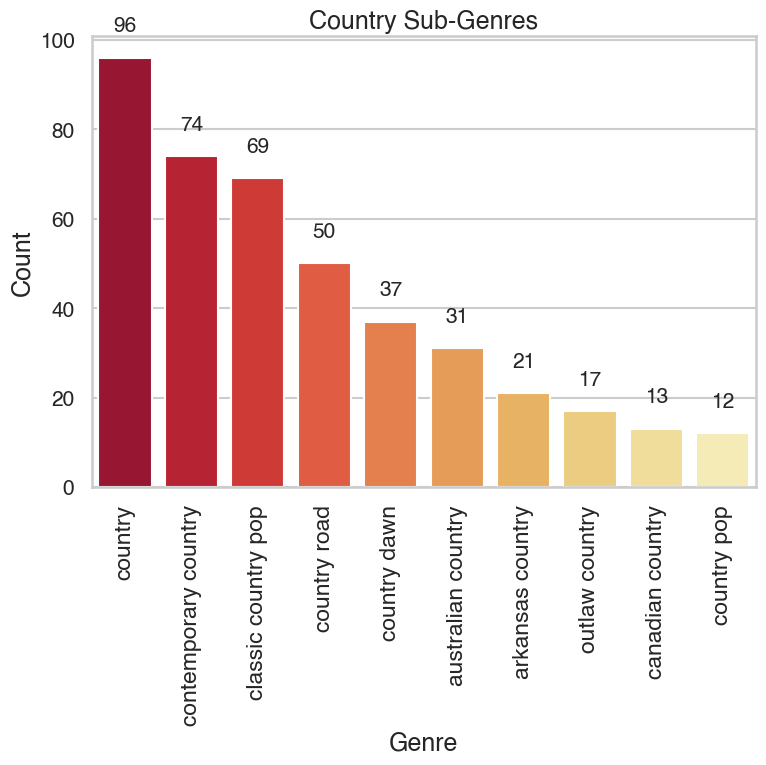

In [30]:
# Show top 10 "country" sub-genres, excluding "country" itself
country_subgenres_all = genres_10k_df[genres_10k_df['genre'].str.contains('country', case=False)]
country_subgenres_top10 = country_subgenres_all.sort_values(by='count', ascending=False).head(11).iloc[1:]

# Convert the top 10 subgenres to a DataFrame for seaborn usage
country_subgenres_df = country_subgenres_top10.sort_values(by='count', ascending=False)

# Set the seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the bar plot with pastel colormap
plt.figure(figsize=(8, 8))
sns.barplot(x='genre', y='count', data=country_subgenres_df, palette='YlOrRd_r')

# Add text annotations to each bar
for idx, value in enumerate(country_subgenres_df['count']):
    plt.text(idx, value + 5, str(value), ha='center', va='bottom', fontname='Helvetica', fontsize=15)

# Set the title and axis labels
plt.title('Country Sub-Genres', fontname='Helvetica')
plt.xlabel('Genre', fontname='Helvetica')
plt.ylabel('Count', fontname='Helvetica')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90, fontname='Helvetica')
plt.yticks(fontname='Helvetica', fontsize=15)

# Display the plot
plt.tight_layout()
plt.show()

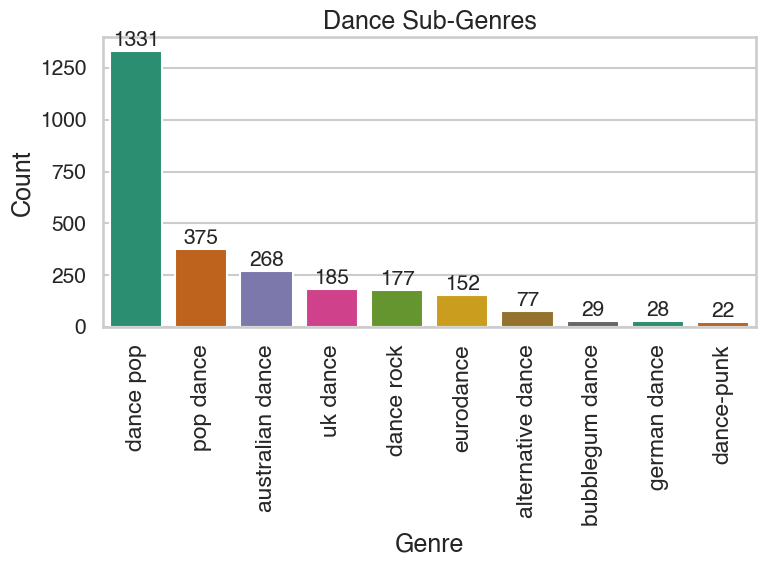

In [31]:
# Show top 10 "dance" sub-genres
dance_subgenres_all = genres_10k_df[genres_10k_df['genre'].str.contains('dance', case=False)]
dance_subgenres_top10 = dance_subgenres_all.sort_values(by='count', ascending=False).head(10)

# Convert the top 10 subgenres to a DataFrame for seaborn usage
dance_subgenres_df = dance_subgenres_top10.sort_values(by='count', ascending=False)

# Set the seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the bar plot with pastel colormap
plt.figure(figsize=(8, 6))
sns.barplot(x='genre', y='count', data=dance_subgenres_df, palette='Dark2')

# Add text annotations to each bar
for idx, value in enumerate(dance_subgenres_df['count']):
    plt.text(idx, value + 5, str(value), ha='center', va='bottom', fontname='Helvetica', fontsize=15)

# Set the title and axis labels
plt.title('Dance Sub-Genres', fontname='Helvetica')
plt.xlabel('Genre', fontname='Helvetica')
plt.ylabel('Count', fontname='Helvetica')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90, fontname='Helvetica')
plt.yticks(fontname='Helvetica', fontsize=15)

# Display the plot
plt.tight_layout()
plt.show()

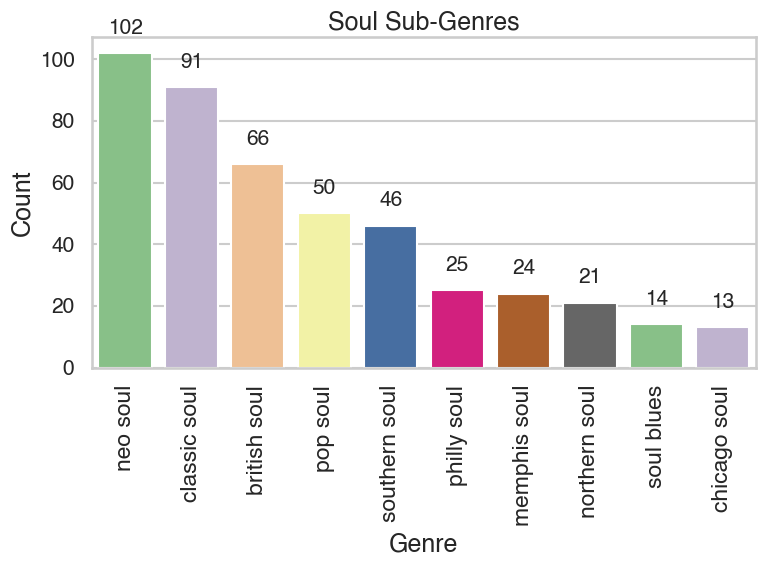

In [32]:
# Show top 10 "soul" sub-genres, excluding "soul" itself
soul_subgenres_all = genres_10k_df[genres_10k_df['genre'].str.contains('soul', case=False)]
soul_subgenres_top10 = soul_subgenres_all.sort_values(by='count', ascending=False).head(11).iloc[1:]

# Convert the top 10 subgenres to a DataFrame for seaborn usage
soul_subgenres_df = soul_subgenres_top10.sort_values(by='count', ascending=False)

# Set the seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the bar plot with pastel colormap
plt.figure(figsize=(8, 6))
sns.barplot(x='genre', y='count', data=soul_subgenres_df, palette='Accent')

# Add text annotations to each bar
for idx, value in enumerate(soul_subgenres_df['count']):
    plt.text(idx, value + 5, str(value), ha='center', va='bottom', fontname='Helvetica', fontsize=15)

# Set the title and axis labels
plt.title('Soul Sub-Genres', fontname='Helvetica')
plt.xlabel('Genre', fontname='Helvetica')
plt.ylabel('Count', fontname='Helvetica')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90, fontname='Helvetica')
plt.yticks(fontname='Helvetica', fontsize=15)

# Display the plot
plt.tight_layout()
plt.show()

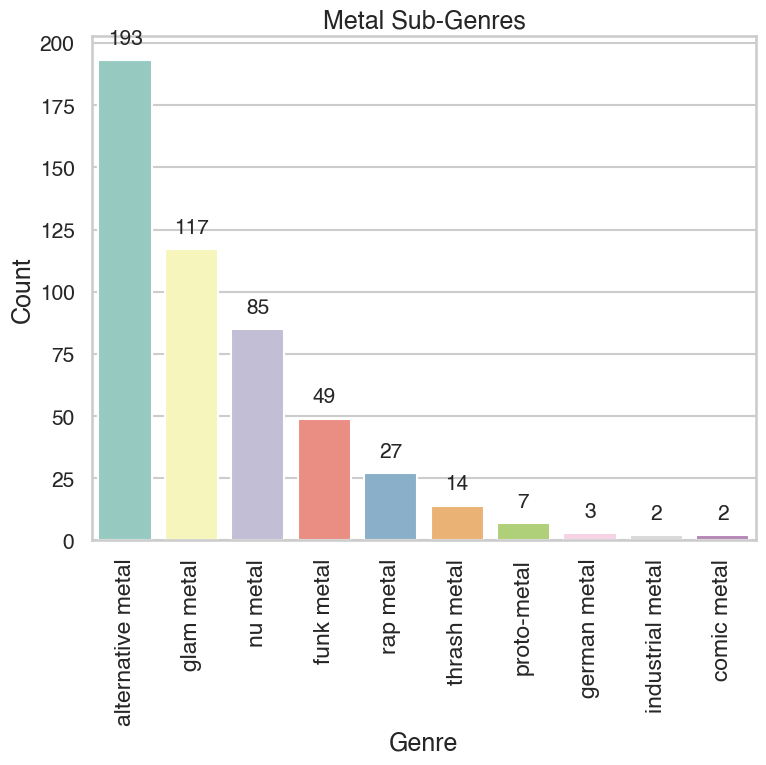

In [33]:
# Show top 10 "metal" sub-genres, excluding "metal" itself
metal_subgenres_all = genres_10k_df[genres_10k_df['genre'].str.contains('metal', case=False)]
metal_subgenres_top10 = metal_subgenres_all.sort_values(by='count', ascending=False).head(11).drop(276, axis=0)

# Convert the top 10 subgenres to a DataFrame for seaborn usage
metal_subgenres_df = metal_subgenres_top10.sort_values(by='count', ascending=False)

# Set the seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the bar plot with pastel colormap
plt.figure(figsize=(8, 8))
sns.barplot(x='genre', y='count', data=metal_subgenres_df, palette='Set3')

# Add text annotations to each bar
for idx, value in enumerate(metal_subgenres_df['count']):
    plt.text(idx, value + 5, str(value), ha='center', va='bottom', fontname='Helvetica', fontsize=15)

# Set the title and axis labels
plt.title('Metal Sub-Genres', fontname='Helvetica')
plt.xlabel('Genre', fontname='Helvetica')
plt.ylabel('Count', fontname='Helvetica')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90, fontname='Helvetica')
plt.yticks(fontname='Helvetica', fontsize=15)

# Display the plot
plt.tight_layout()
plt.show()

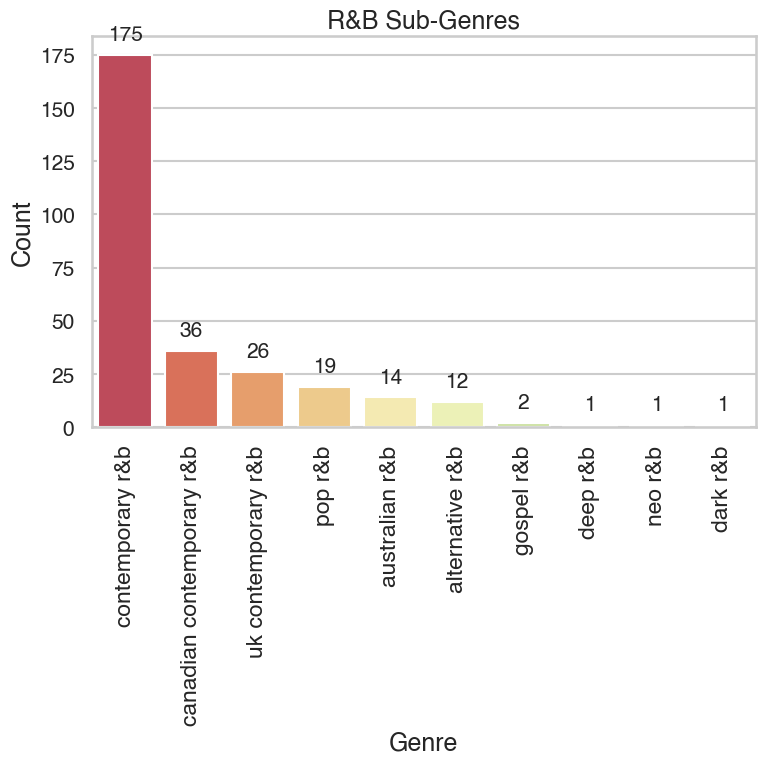

In [34]:
# Show top 10 "r&b" sub-genres, excluding "r&b" itself
rnb_subgenres_all = genres_10k_df[genres_10k_df['genre'].str.contains('r&b', case=False)]
rnb_subgenres_top10 = rnb_subgenres_all.sort_values(by='count', ascending=False).head(11).iloc[1:]

# Convert the top 10 subgenres to a DataFrame for seaborn usage
rnb_subgenres_df = rnb_subgenres_top10.sort_values(by='count', ascending=False)

# Set the seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the bar plot with pastel colormap
plt.figure(figsize=(8, 8))
sns.barplot(x='genre', y='count', data=rnb_subgenres_df, palette='Spectral')

# Add text annotations to each bar
for idx, value in enumerate(rnb_subgenres_df['count']):
    plt.text(idx, value + 5, str(value), ha='center', va='bottom', fontname='Helvetica', fontsize=15)

# Set the title and axis labels
plt.title('R&B Sub-Genres', fontname='Helvetica')
plt.xlabel('Genre', fontname='Helvetica')
plt.ylabel('Count', fontname='Helvetica')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90, fontname='Helvetica')
plt.yticks(fontname='Helvetica', fontsize=15)

# Display the plot
plt.tight_layout()
plt.show()

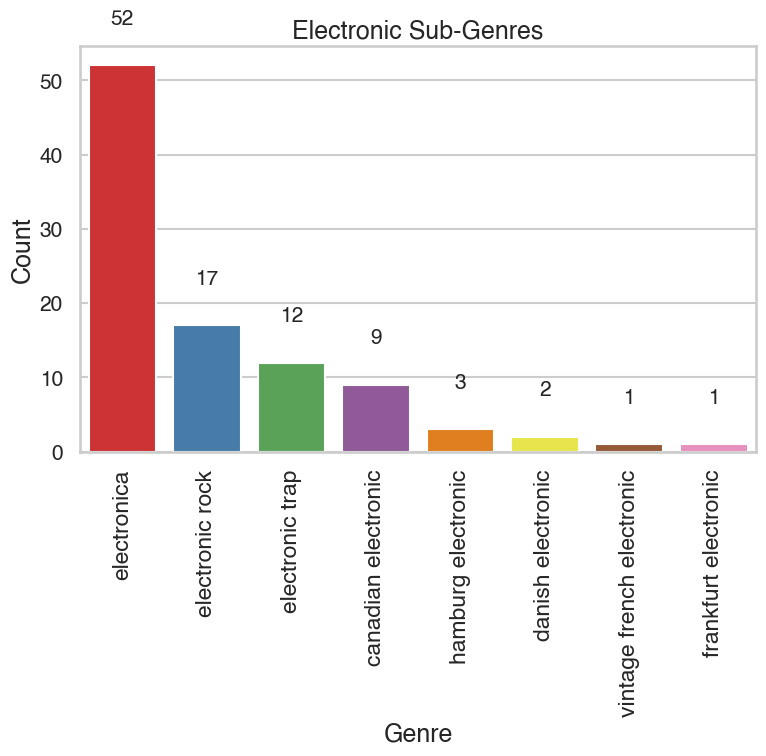

In [35]:
# Show top 10 "electronic" sub-genres
electronic_subgenres_all = genres_10k_df[genres_10k_df['genre'].str.contains('electronic', case=False)]
electronic_subgenres_top10 = electronic_subgenres_all.sort_values(by='count', ascending=False).head(10)

# Convert the top 10 subgenres to a DataFrame for seaborn usage
electronic_subgenres_df = electronic_subgenres_top10.sort_values(by='count', ascending=False)

# Set the seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the bar plot with pastel colormap
plt.figure(figsize=(8, 8))
sns.barplot(x='genre', y='count', data=electronic_subgenres_df, palette='Set1')

# Add text annotations to each bar
for idx, value in enumerate(electronic_subgenres_df['count']):
    plt.text(idx, value + 5, str(value), ha='center', va='bottom', fontname='Helvetica', fontsize=15)

# Set the title and axis labels
plt.title('Electronic Sub-Genres', fontname='Helvetica')
plt.xlabel('Genre', fontname='Helvetica')
plt.ylabel('Count', fontname='Helvetica')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90, fontname='Helvetica')
plt.yticks(fontname='Helvetica', fontsize=15)

# Display the plot
plt.tight_layout()
plt.show()

##### Final note

Originally, I planned to have the first stage be split into two stages (with a total of three stages):
1. Select top 3 favourite genres, where each genre will display the top 5 sub-genres
2. Select top 3 favourite sub-genres to generate a list of random tracks
3. Select at least 3 songs from the randomly generated list to create your own personalist playlist of 15 songs

However, I decided to retract this idea as I wanted to reduce friction in the user journey. My user studies have also shown that not all users are familiar with the exact names of their favourite genres so giving users the option to be as generic or as specific as they want when selecting genres is better for them.

---